Dataset  : Fashion : [MNIST datset](https://github.com/zalandoresearch/fashion-mnist)

Import required libraries

In [ ]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

In [ ]:
# Import tensorflow datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Support libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Import the fashion MNIST dataset

In [ ]:
dataset,metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset,test_dataset = dataset['train'], dataset['test']

Labels available

In [ ]:
class_names = metadata.features['label'].names
print("Class names : {}".format(class_names))

Class names : ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Exploring the data

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples: 10000


Preprocess the data

In [ ]:
def normalize(images,labels):
  images = tf.cast(images,tf.float32)
  images/=255
  return images,labels

#The map function applies normalization to each element in train and test sets
train_dataset = train_dataset.map(normalize) 
test_dataset = test_dataset.map(normalize) 

#First loading of dataset takes time, caching helps to store it in memmory
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

Explore processed image

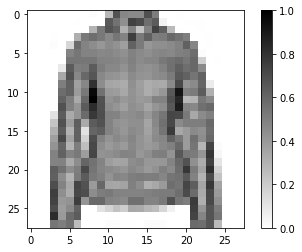

In [ ]:
# Take single image and remove color dimension
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

#Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

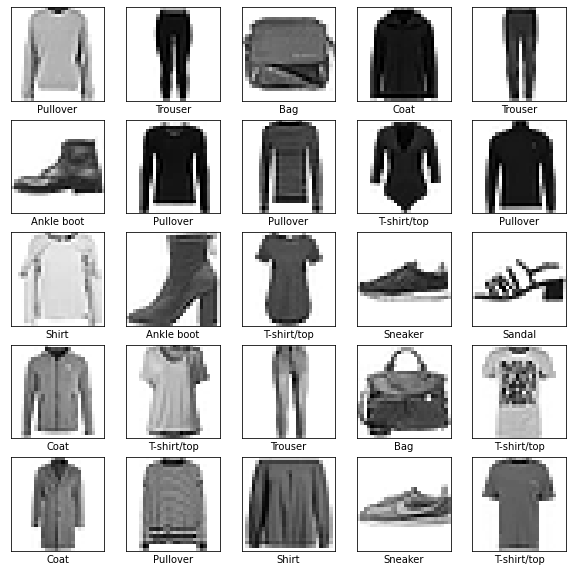

In [ ]:
# verification of 25 images from train data with labels
plt.figure(figsize=(10,10))
for i,(image,label) in enumerate(train_dataset.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,cmap = plt.cm.binary)
  plt.xlabel(class_names[label])
plt.show()

Buliding Layers


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
]) 

Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Train the model

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [ ]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 13s 4ms/step - loss: 0.4928 - accuracy: 0.8259
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3758 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3333 - accuracy: 0.8794
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3104 - accuracy: 0.8870
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8913


Evaluate accuracy

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on the test set :',test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3453 - accuracy: 0.8784
Accuracy on the test set : 0.8784000277519226


Make predictions and explore

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([1.0703079e-04, 1.9986719e-06, 3.0986538e-02, 8.4749587e-07,
       8.8707536e-01, 2.1108122e-10, 8.1787370e-02, 9.9206294e-12,
       4.0810657e-05, 7.2117325e-09], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels[0]

4

Graph of all 32 predictions

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0],cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color = color)
  
def plot_value_array(i, predictions_array, true_labels):
  predictions_array, true_label = predictions_array[i], true_labels[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

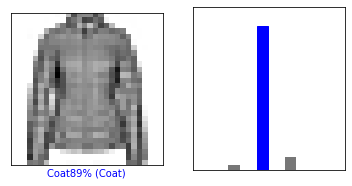

In [ ]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

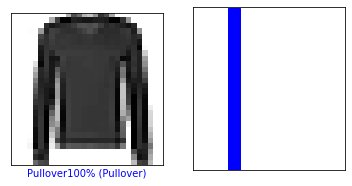

In [ ]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

Moreee predictions

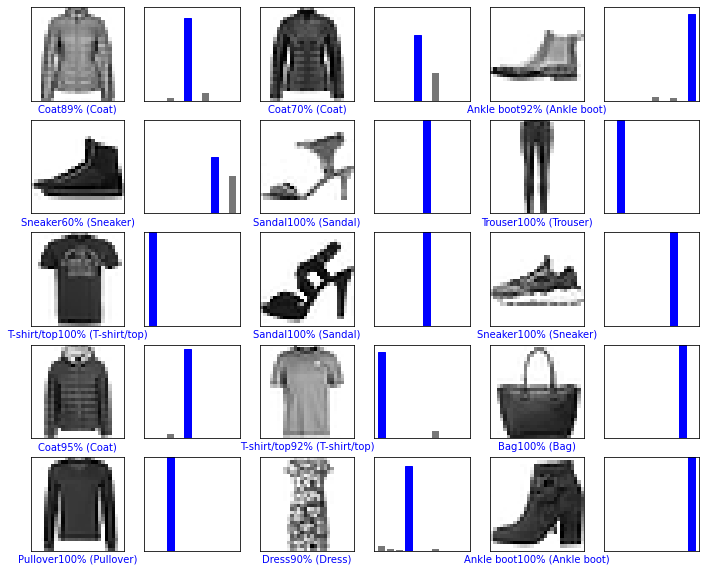

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions,test_labels,test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i,predictions,test_labels)

Image from test data set

In [ ]:
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [ ]:
# tf.keras make prediction on batches so add to list
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [ ]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.0703087e-04 1.9986715e-06 3.0986549e-02 8.4749570e-07 8.8707519e-01
  2.1108118e-10 8.1787504e-02 9.9206268e-12 4.0810646e-05 7.2117445e-09]]


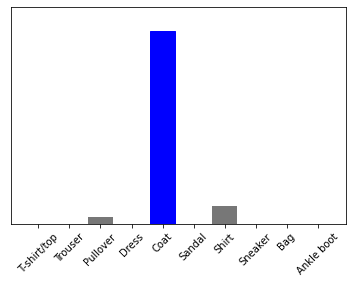

In [ ]:
plot_value_array(0,predictions_single,test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)

In [ ]:
np.argmax(predictions_single)

4